# การเรียนรู้ของเครื่องแบบมีผู้สอน

###การสำรวจข้อมูล

In [ ]:
#การสำรวจข้อมูล
from sklearn.datasets import load_iris
iris = load_iris()
print(iris) #จะได้ aray 2 ส่วน คือ data กับ target โดย data จะเป็นตัวแปร X ส่วน target จะเป็นตัวแปร y ที่เป็นคำตอบว่า
            #ดอกไอริสที่นำมาทดสอบนั้นเป็นพันธุ์อะไร ซึ่งจะมี setosa, versicolor,virginica

import numpy as np
import pandas as pd

dataset1 = pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                        columns=['sepal_length','sepal_width',
                                'petal_length','petal_width','species']) #สร้างดาต้าเฟรมโดยเอาอาเรย์ทั้งสองส่วนมารวมกัน
                                #โดยใช้ฟังก์ชั่น c_
dataset1['species'] = np.select([dataset1.species.eq(0.0),
                                 dataset1.species.eq(1.0),
                                 dataset1.species.eq(2.0)],
                                ['setosa','versicolor','virginica']) #เปลี่ยนค่าตัวเลขใน target เป็นข้อมูล string
print(dataset1)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

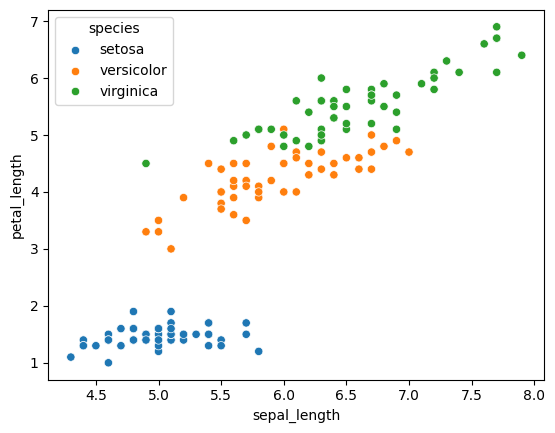

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x ='sepal_length',y='petal_length',data = dataset1,hue ='species') #ภาพแยกสีตามสายพันธ์ด้วย hue
plt.show()

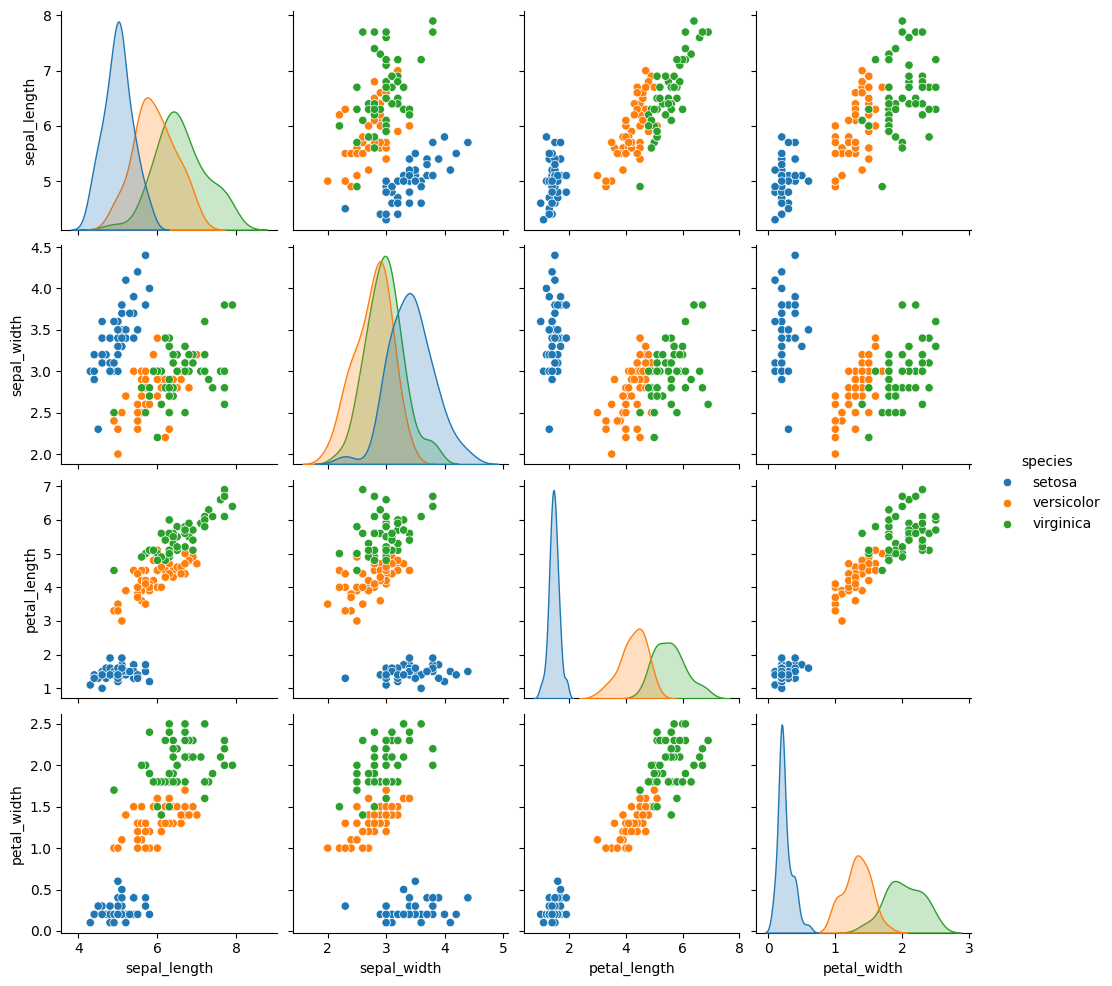

In [ ]:
sns.pairplot(dataset1,hue='species') #สร้างแพร์พล็อตจากข้อมูลโดยแบ่งกลุ่มจาก hue
plt.show()

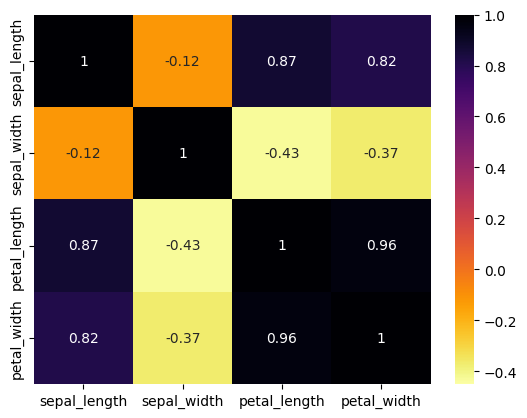

In [ ]:
reversed_cmap = sns.color_palette('inferno',as_cmap=True).reversed() #สร้างชุดสีแบบ inferno ไล่จากสีเหลืองไปสีดำ
                                                                     #ตามค่าตัวเลขต่ำไปหาสูง
#sns.heatmap(dataset1.corr(),annot=True,cmap=reversed_cmap,vmin=-0.45,vmax=1.00) #สร้าง heatmap
# Calculate correlations only for numerical columns
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
#โดยปกติแล้ว heatmap จะใช้แสดงความสัมพันธ์ระหว่างตัวแปรที่เป็นตัวเลขเท่านั้น แต่ใน DataFrame 'dataset1' ของเรา
#มีคอลัมน์ 'species' ที่เก็บข้อมูลเป็นข้อความ ('setosa', 'versicolor', 'virginica') ทำให้ฟังก์ชัน .corr()
#ที่ใช้คำนวณความสัมพันธ์ไม่สามารถจัดการกับข้อมูลประเภทข้อความได้ จึงเกิดข้อผิดพลาดขึ้น
#การแก้ไขคือเราต้องเลือกเฉพาะคอลัมน์ที่เป็นตัวเลขมาใช้ในการสร้าง heatmap เท่านั้น
sns.heatmap(dataset1[numerical_columns].corr(), annot=True, cmap=reversed_cmap, vmin=-0.45, vmax=1.00)
#annot ให้แสดงตัวเลขกำกับในแต่ละช่องของฮีทแมป
#dataset.corr() ให้ค่า correlation ระหว่างคู่ตัวแปรในด้าต้าเฟรม
plt.show()

###การแบ่งหน่วยตัวอย่างเพื่อเรียนรู้และการทดสอบ

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data #ให้ตัวแปร ) ใหญ่ เป็นอาเรย์ข้อมูฃในส่วนของ data เนื่องจากตัวแปรต้นนั้นมีข้อมูลอยู่หลายตัวด้วยกัน
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train, "\n", y_train, "\n", X_test, "\n", y_test)

[[6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.

###การสร้างตัวแบบการเรียนรู้ของเครื่องแบบมีผู้สอน

1.การสร้างตัวจำแนกนาอีฟ-เบย์

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X,y = load_iris(return_X_y=True) #โหลดข้อมูลมาไว้ในหน่วยความจำเพื่อเตรียมประมวลผลข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = GaussianNB() #สร้างตัวแบบการเรียนรู้ของเครื่องแบบมีผู้สอน model
model.fit(X_train,y_train)
y_pred = model.predict(X_test) #นำอาเรย์ x_test มาทำนายค่า y แล้วเก็บผลการทำนายไว้ใน y_pred
print('y_test are %s'% y_test)
print('y_pred are %s'% y_pred) #%s: เป็นรูปแบบการแทนที่ค่าของตัวแปรที่เป็นสตริง (string format specifier)
                               #ซึ่งใน Python สามารถใช้แทนที่ค่าของตัวแปรที่เป็นประเภทสตริง, ตัวเลข, หรือวัตถุใดๆ ก็ตาม
                               #ที่สามารถแปลงเป็นสตริงได้
print('Number of mislabeled points out of a total %d points : %d' %(X_test.shape[0],(y_test != y_pred).sum()))
#'Number of mislabeled points out of a total %d points : %d':
#สตริงที่มีข้อความ 'Number of mislabeled points out of a total %d points : %d'
#ซึ่งมีตัวแปร %d สองตัวที่ทำหน้าที่เป็น placeholder สำหรับการแทนที่ค่าของตัวแปรที่เป็นตัวเลข (integer)

#% (X_test.shape[0], (y_test != y_pred).sum()): เป็นการใช้ตัวดำเนินการ % เพื่อแทนที่ค่าในสตริง
                                               #โดยในที่นี้จะมีสองค่าที่จะถูกแทนที่ใน %d คือ

#X_test.shape[0]: จำนวนข้อมูลทั้งหมดในชุดข้อมูล X_test ซึ่งจะให้จำนวนของแถวใน X_test
#(y_test != y_pred).sum(): จำนวนข้อมูลที่คาดการณ์ผิดพลาด โดยเปรียบเทียบค่าที่แท้จริง (y_test) กับค่าที่คาดการณ์ (y_pred)
#และนับจำนวนของค่าที่ไม่ตรงกัน

y_test are [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]
y_pred are [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]
Number of mislabeled points out of a total 15 points : 0


การวัดประสิทธิภาพด้วยค่า accuracy,precision,recall

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

#แถวแรกจะให้ค่า precision ของแต่ละคลาส
#แถวสองจะให้ค่า recall ของแต่ละคลาส
#แถวสามจะให้ค่า f1-score ของแต่ละคลาส เป็นค่ากลางระหว่าง precision , recall
#แถวที่สี่ให้ค่า support ที่แสดงถึงจำนวนหน่วยตัวอย่างของแต่ละคลาสในชุดข้อมูล

(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([6, 6, 3]))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
# 6,6,3 เป็นการทำนายที่ถูกต้องของแต่ละคลาส โดยตัวแบบที่มีประสิทธิภาพดีกว่าจะให้ภาพคอนฟิวชั่นเมทริกซ์ที่ตัวเลขมีค่าสูงในแนวทแยงมุม
# จากบนซ้ายสู่ล่างขวา จากภาพที่ได้ไม่มีข้อมูลใดที่ผิดพลาดออกมาเลย = 0

array([[6, 0, 0],
       [0, 6, 0],
       [0, 0, 3]])

การแบ่งกลุ่มและวัดประสิทธิภาพของตัวแบบด้วยเทคนิคครอสแวลิเดชั่น

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
X,y = load_iris(return_X_y=True)
model = GaussianNB()
cross_val_score(model,X,y,cv=5) #สร้างตัวแบบการทำนายผลลัพธ์พร้อมทำกระบวนการ cross validation แบบ 5 fold
                                #จะได้ค่า accuracy ของการเรียนรู้ทั้ง 5 รอบสู่หน้าจอ
#โดยหากนักวิทยาศาสตร์ใช้คำสั่ง cross_validation_score แล้ว ไม่จำเป็นต้องใช้คำสั่ง train_test_split ในการแยกข้อมูล และคำสั่ง fit ด้วย

array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 1.        ])

การนำตัวแบบไปใช้งาน

In [ ]:
print(model.predict([[1.0,1.0,1.0,1.0]]))
print(model.predict([[1,2,5,6]]))
print(model.predict([[5,3,5,6]]))


[1]
[2]
[2]


###2.การสร้างตัวจำแนกต้นไม้ตัดสินใจ

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
dtc = DecisionTreeClassifier(criterion='entropy',min_samples_split=2) #กำหนดค่า entropy ในการสร้า่งทางแยก
                                              #โดยแต่ละทางแยกต้องมีหน่วยตัวอย่างอย่างน้อย 2 หน่วยตัวอย่าง
model = dtc.fit(X_train,y_train)
y_pred = model.predict(X_test) #นำอาเรย์ X_test มาทำนายค่า y แล้วเก็บผลการทำนายไว้ใน y_pred

print('y_test are %s' % y_test)
print('y_pred are %s' % y_pred)
print('Number of mislabeled points out of a total %d points : %d' %(X_test.shape[0],(y_test != y_pred).sum()))


y_test are [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
y_pred are [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
Number of mislabeled points out of a total 15 points : 0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([3, 8, 4]))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[3, 0, 0],
       [0, 8, 0],
       [0, 0, 4]])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
X,y = load_iris(return_X_y=True)
dtc2 = DecisionTreeClassifier(criterion='entropy',min_samples_split=2)
cross_val_score(dtc2,X,y,cv=5)


array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

การแสดงแผนผังของต้นไม้ตัดสินใจ


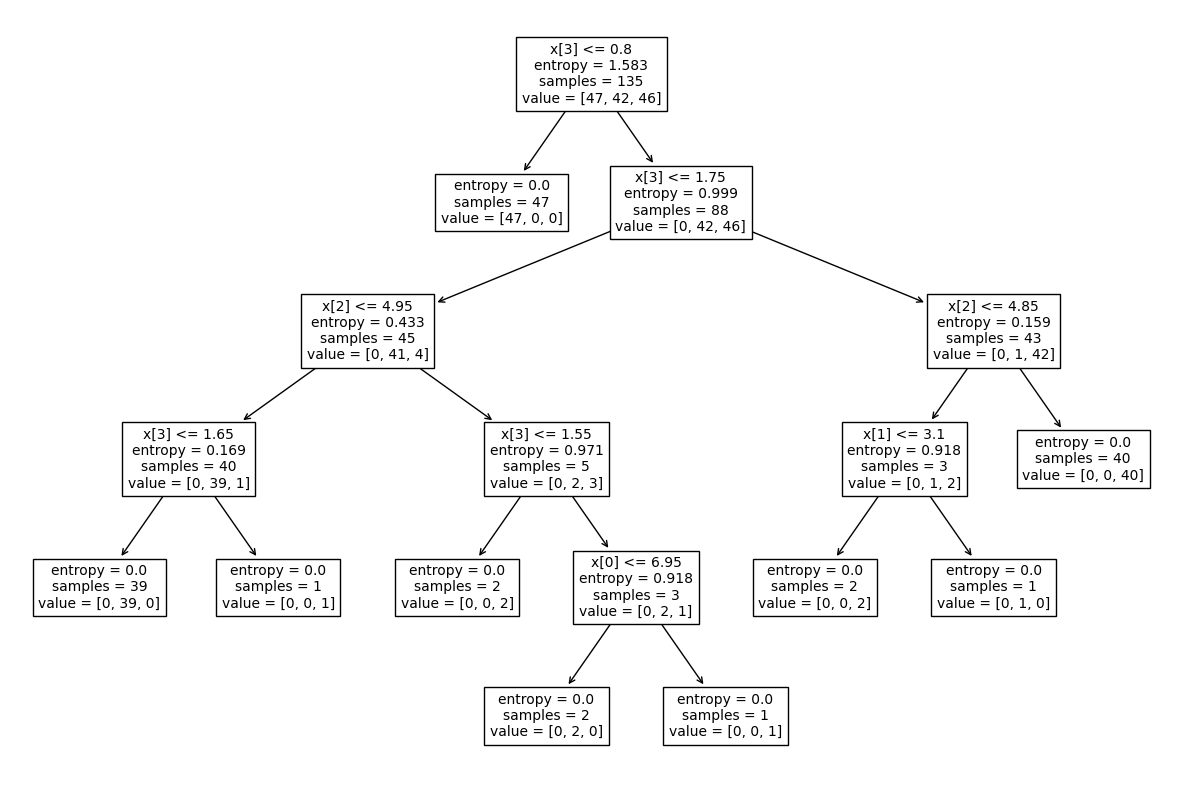

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(dtc,fontsize=10)
plt.show() #การสร้างโหนดจะทำไปเรื่อยๆ จนกว่าจะขจัดเอนโทรพีได้เป็นที่น่าพอใจ กล่าวคือ โหนดปลายสุด เป็น 0 ทั้งหมด

การนำตัวแบบจากตัวอย่างไปใช้งาน

In [ ]:
print(model.predict([[1.0,1.0,1.0,1.0]]))
print(model.predict([[1,2,5,6]]))
print(model.predict([[5,3,5,6]]))

[1]
[2]
[2]


แรนดอมฟอร์เรศ (Random Forest) จะให้ค่าที่แม่นยำมากขึ้นมากกว่า DTC ที่อาจเกิดปัญหา overfitting modeling ได้ ด้วยวิธีการสร้างต้นไม้หลายต้นจากชุดข้อมูลที่เกิดจากการสุ่มหน่วยตัวอย่างจากชุดข้อมูลตั้งต้น โดยเป็นการสุ่มแบบใส่คืน แล้วนำผลลัพธ์สุดท้ายมาพิจารณารวมกันหรือการโหวตว่าน่าจะมีคำตอบเป็นอย่างไร ในศาสตร์ทางการเรียนรู้ของเครื่องเรียกเทคนิคที่ใช้ตัวแบบหลายตัวมาร่วมกันทำนายผลลัพธ์ฺในลักษณะนี้ว่า ensemble โดยใช้การสุ่มแบบใส่คืนที่ และการสุ่มแบบไม่ใส่คืนเรียกว่า pasting ก็ได้ โดย Random Forest เป็น ensemble ที่ใช้ตัวแบบต้นไม้ตัดสินใจนั่นเอง***

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

rfc = RandomForestClassifier(n_estimators=100,criterion='entropy',min_samples_split=2)
#พารามิเตอร์  n_estimators คือ การสั่งให้สร้างต้นไม้มา 100 แบบ เพื่อร่วมกันทำนายผลลัพธ์
model = rfc.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('y_test are %s' % y_test)
print('y_pred are %s' % y_pred)
print('Number of mislabeled points out of a total %d points : %d' %(X_test.shape[0],(y_test != y_pred).sum()))


y_test are [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
y_pred are [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
Number of mislabeled points out of a total 15 points : 0


การนำตัวแบบไปใช้งาน

In [ ]:
print(model.predict([[1.0,1.0,1.0,1.0]]))
print(model.predict([[1,2,5,6]]))
print(model.predict([[5,3,5,6]]))


[0]
[2]
[2]


###3.การสร้างตัวแบบด้วยอัลกอริทึม K-nearest Neighbors Classifier : KNN

เร่ิมต้นด้วยการกำหนดค่า K ว่าจะใช้กี่กลุ่ม และใช้การวัดระยะห่างแบบยูคลิดมาจำแนก

In [ ]:
import numpy as np
np.random.seed(0)
X = np.random.randn(50,2) #สร้างอาเรย์ 50 แถว 2 คอลัมน์
y = np.array([0]*25+[1]*25)
print(X)
print(y) #สร้างผลเฉลยโดย 25 แถวแรกเป็นคลาส 0  อีก 25 แถวเป็นคลาส 1

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]
 [-0.34791215  0.15634897]
 [ 1.23029068  1.20237985]
 [-0.38732682 -0.30230275]
 [-1.04855297 -1.42001794]
 [-1.70627019  1.9507754 ]
 [-0.50965218 -0.4380743 ]
 [-1.25279536  0.77749036]
 [-1.61389785 -0.21274028]
 [-0.89546656  0.3869025 ]
 [-0.51080514 -1.18063218]
 [-0.02818223  0.42833187]
 [ 0.06651722  0.3024719 ]
 [-0.63432209 -0.36274117]
 [-0.67246045 -0.35955316]
 [-0.81314628 -1.7262826 ]
 [ 0.17742614 -0.40178094]
 [-1.63019835  0.46278226]
 [-0.90729836  0.0519454 ]
 [ 0.72909056  0.12898291]
 [ 1.13940068 -1.23482582]
 

In [ ]:
#สร้างตัวแบบด้วย KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

new_instance = np.array([0.5,0.5]) #สร้างหน่วยตัวอย่างใหม่ ให้ x1=0.5 ,x2=0.5
predicted_class = knn.predict([new_instance]) #ให้ตัวแบบจากบรรทัดที่ 4 มาตัดสินใจเลือกคลาสให้หน่วยตัวอย่างใหม่ที่สร้างขึ้น
print('predicted class:',predicted_class)


predicted class: [0]


การแสดงตำแหน่งและระยะห่างจากหน่วยตัวอย่างเพื่อนบ้านที่ใช้้้ตัดสินคลาส

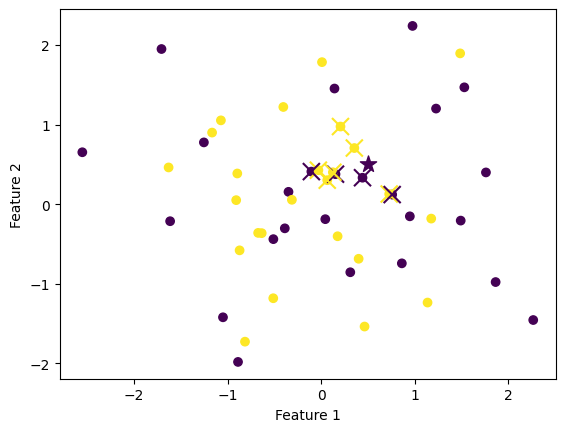

In [ ]:
import matplotlib.pyplot as plt
distance,indices = knn.kneighbors([new_instance])
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(X[indices,0],X[indices,1],c=np.squeeze(y[indices]),s=150,marker='x')
plt.scatter(new_instance[0],new_instance[1],c=predicted_class,marker='*', s=150)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

การสร้างตัวแบบการเรียนรู้ของเครื่องสำหรับปัญหาการจำแนกสายพันธ์ดอกไอริส

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(y_test)
print(y_pred)
print('Accuracy :',accuracy)

[1 1 2 2 0 1 2 0 0 0 2 2 1 2 2]
[1 1 2 2 0 1 2 0 0 0 2 2 2 2 2]
Accuracy : 0.9333333333333333


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred) #จะได้ค่าอาเรย์โดยเร่ิมจากแถวแรกคือ ค่า precision ในแต่ละคลาส จบที่ support

(array([1.   , 1.   , 0.875]),
 array([1.  , 0.75, 1.  ]),
 array([1.        , 0.85714286, 0.93333333]),
 array([4, 4, 7]))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred) #ตัวแบบทำนายได้ถูกต้อง 14 ดอก และทำนายผิดไป 1 ดอก(ทำนายคลาส 1 เป็นคลาส 2)

array([[4, 0, 0],
       [0, 3, 1],
       [0, 0, 7]])

###4.การสร้าวตัวแบบด้วยอัลกอริทึม Support Vector Machine

<ipython-input-25-90b915db4026>:55: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contourf(xx,yy,Z,colors='k',level=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])


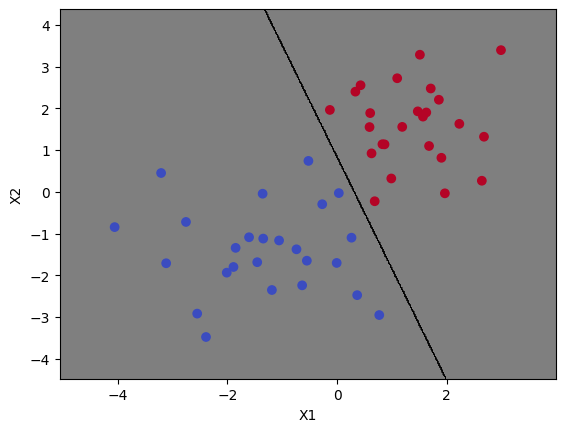

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(0)
# Generate the data points in a way that results in a 2D array
X = np.vstack((np.random.randn(25,2)-[1.5,1.5], np.random.randn(25,2)+[1.5,1.5]))

'''
การสร้าง array สองมิติในภาษา Python โดยใช้ numpy (np). เรามาอธิบายทีละส่วนกันครับ:

np.random.randn(25, 2):

ฟังก์ชัน np.random.randn ของ numpy จะสร้าง array สองมิติที่มีขนาด 25x2 โดยแต่ละค่าจะถูกสุ่มจากการแจกแจงแบบปกติ (normal distribution) ที่มีค่าเฉลี่ย 0 และส่วนเบี่ยงเบนมาตรฐาน 1.
- [1.5, 1.5] และ + [1.5, 1.5]:

สำหรับ array ที่สร้างขึ้นมาจาก np.random.randn(25, 2), การลบด้วย [1.5, 1.5] หมายถึงการเลื่อนจุดข้อมูลทั้งหมดให้ค่าทุกตัวลดลง 1.5 ในทั้งสองมิติ (x และ y).
ในทำนองเดียวกัน การบวกด้วย [1.5, 1.5] หมายถึงการเลื่อนจุดข้อมูลทั้งหมดให้ค่าทุกตัวเพิ่มขึ้น 1.5 ในทั้งสองมิติ (x และ y).
np.vstack((..., ...)):

ฟังก์ชัน np.vstack จะนำ array ที่อยู่ใน tuple มารวมกันในแนวตั้ง (vertically stack) หรือก็คือการเชื่อมต่อกันในมิติที่ 0.

'''
y = [0]*25+[1]*25

'''การสร้างลิสต์ (list) ในภาษา Python โดยใช้การทำซ้ำค่าและการรวมลิสต์ ซึ่งสามารถอธิบายได้ดังนี้:

[0]*25:
ส่วนนี้สร้างลิสต์ที่มีจำนวนสมาชิกเป็น 25 ตัว โดยแต่ละตัวจะมีค่าเป็น 0.
ผลลัพธ์จะเป็น [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1]*25:
ส่วนนี้สร้างลิสต์ที่มีจำนวนสมาชิกเป็น 25 ตัว โดยแต่ละตัวจะมีค่าเป็น 1.
ผลลัพธ์จะเป็น [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

+:
เครื่องหมายบวกในที่นี้ใช้ในการรวมลิสต์สองลิสต์เข้าด้วยกัน (concatenation).
เมื่อรวมส่วนทั้งสองเข้าด้วยกันจะได้ลิสต์ที่มี 50 ตัว โดย 25 ตัวแรกจะเป็น 0 และ 25 ตัวหลังจะเป็น 1 ดังนี้:

y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

นี่คือวิธีการสร้างลิสต์ตามที่อธิบายครับ

'''

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)

x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,colors='k',level=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
plt.scatter(X[:,0],X[:,1], c=y ,cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

การสร้างหน่วยตัวอย่างใหม่พร้อมใช้เส้นไฮเปอร์เพลนในการทำนายคลาสของหน่วยตัวอย่าง

In [ ]:
new_instance = np.array([-0.5,0]).reshape(1,-1)
predicted_class = clf.predict(new_instance)
print('predicted class:',predicted_class)

predicted class: [0]


<ipython-input-29-782d84b7d8bc>:1: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contour(xx,yy,Z,colors='k',level=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])


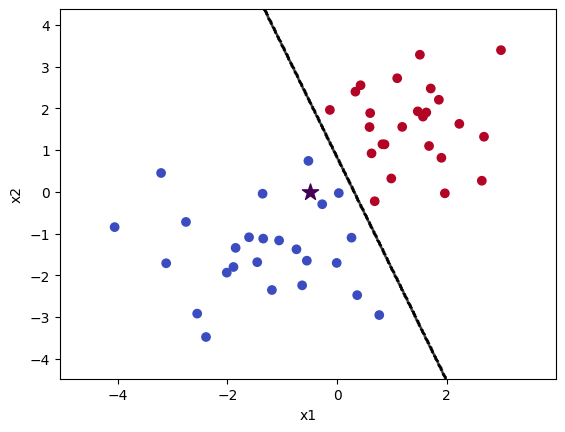

In [ ]:
plt.contour(xx,yy,Z,colors='k',level=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
plt.scatter(X[:,0],X[:,1], c=y ,cmap=plt.cm.coolwarm)
plt.scatter(new_instance[:,0],new_instance[:,1],c=predicted_class,marker='*',s=150)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

การสร้างตัวแบบการเรียนรู้ของเครื่องสำหรับปัญหาการจำแนกสายพันธฺ์ดอกไอริส

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42)

clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(y_test)
print(y_pred)
print('Accuracy :',accuracy)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy : 1.0


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

(array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([1., 1., 1.]),
 array([19, 13, 13]))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42)

clf = svm.SVC(kernel='poly') #svm  ที่มีไฮเปอร์เพลนแบบเส้นโค้งจากฟังก์ชั่นพหุนาม
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(y_test)
print(y_pred)
print('Accuracy :',accuracy)

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy : 0.9777777777777777


array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42)

clf = svm.SVC(kernel='rbf') #svm  ที่มีไฮเปอร์เพลนแบบเส้นโค้งจากฟังก์ชั่นเกาเซียน
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(y_test)
print(y_pred)
print('Accuracy :',accuracy)

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Accuracy : 1.0


array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])